Assignment:

Fit a polynomial of degree K to all columns of the following dataset
to predict number of vehicles in the years of 2016 2017 2018 2019 and 2020.

Bonus: 

Use cross validation for finding the best polynomial order and describe you approach.

Deadline : 09.03.2016 Wed  18:59

Your Name : Mustafa Atik <muatik@gmail.com> 2015719018

In [166]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

In [136]:
class Model(object):
    def __init__(self, degree, x, y):
        super(Model, self).__init__()
        self.degree = degree
        self.model = Model.fit(degree, x, y)
    
    @staticmethod
    def fit(degree, x, y):
        """
        x and y are numpy nx1 matrcies

        returns weights
        """
        x = np.hstack(( np.power(x, i) for i in range(degree+1) ))
        # weights = x.I * y
        weights = (x.T * x).I * x.T * y
        return weights

    def predict(self, x):
        """
        model is a numpy matrix which contains weights
        x is a nx1 array of scalar values
        """
        x = np.matrix(x)
        x = np.hstack(( np.power(x, i) for i in range(self.degree+1) ))
        return x * self.model
    

### Finding the best polynomial order
In order to find the best polynomial order, **cross validation** method is used. For each increment of the order, squared error of the test data is calculated until the error value starts to increase.

In [137]:
def findBestPolynomialOrder(xTraining, yTraining, xTest, yTest):
    def calcSquaredError(a, b):
        return np.power(a-b, 2).sum()

    def findDegreeError(degree):
        m = Model(degree=degree, x=xTraining, y=yTraining)
        return calcSquaredError(yTest, m.predict(xTest))


    degree = 1
    minError = findDegreeError(degree)
    while True:
        e = findDegreeError(degree + 1)
        if minError <= e:
            break
        degree += 1
        minError = e
    
    return degree, minError, 

### Plotting
Original data, test data and the model will be plotted on the same figure.

In [138]:
def plot(x, y, xTest, yTest, model, xlabel="", ylabel=""):
    
    # plotting original and test data
    plt.plot(x, y, "bo-", label="training data")
    plt.plot(xTest, yTest, "go-", label="test data")
    
    # plotting model
    x = np.vstack([
        np.matrix(np.linspace(int(x[0]) - 10, int(x[-1]) + 10, len(x) + 200)).T, 
    ])
    plt.plot(x, model.predict(x), "r-",label="model (degree {})".format(model.degree))
    
    plt.legend(loc=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Preparing data
Here we read the csv file and make necessary data massaging on it. 

We need two sets of data: training data and test data. With the test data, we will make cross validation to find the best polynomial degree for linear model.

In [199]:
df = pd.read_csv(u'data/arac.csv',sep=';')

startsAt = 4
baseYear = df.Year[startsAt]

def prepareData(years, values, baseYear=0, yDivison=1.):
    
    x = np.matrix(years[startsAt:]).T - baseYear
    y = np.matrix(values[startsAt:]).T / yDivison

    """
    separating training and test data. 
    even endings will be the training data, odd endings will be the test data.
    
    xTraining = x[::2]
    xTest = x[1::2]
    yTraining = y[::2]
    yTest = y[1::2]
    """
    
    # separeting training and test data. 
    # last 10 items will be the test data, the others will be the training data.
    xTraining = x[:-10]
    xTest = x[-10:]
    yTraining = y[:-10]
    yTest = y[-10:]
    
    return xTraining, xTest, yTraining, yTest

### Linear Regression
We traverse all the columns of the cvs data one by one, and calculate a linear model for each column using a polynomial of order K, where K is the optimal value.

Car


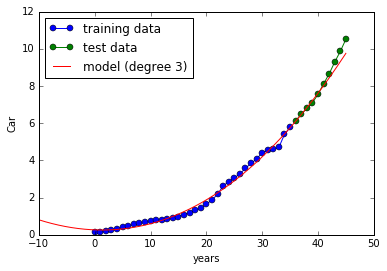

Predictions
Year - number of vehicles
[[ 2016.            10.22239619]
 [ 2017.            10.70103033]
 [ 2018.            11.19208374]
 [ 2019.            11.69563534]]
-------------------------------------------------
Minibus


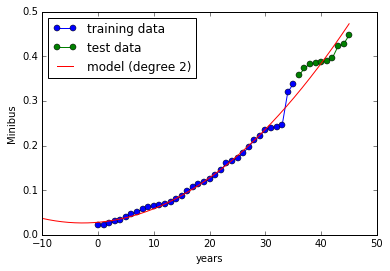

Predictions
Year - number of vehicles
[[  2.01600000e+03   4.91581344e-01]
 [  2.01700000e+03   5.10854059e-01]
 [  2.01800000e+03   5.30518067e-01]
 [  2.01900000e+03   5.50573369e-01]]
-------------------------------------------------
Bus


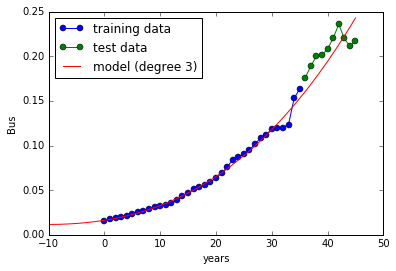

Predictions
Year - number of vehicles
[[  2.01600000e+03   2.53466042e-01]
 [  2.01700000e+03   2.64376210e-01]
 [  2.01800000e+03   2.75596345e-01]
 [  2.01900000e+03   2.87130520e-01]]
-------------------------------------------------
SmallTruck


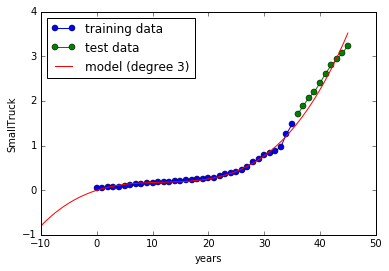

Predictions
Year - number of vehicles
[[ 2016.             3.82170342]
 [ 2017.             4.14403684]
 [ 2018.             4.48501664]
 [ 2019.             4.84517206]]
-------------------------------------------------
Truck


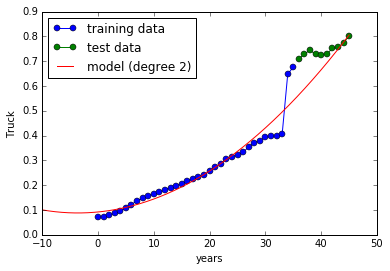

Predictions
Year - number of vehicles
[[  2.01600000e+03   8.35543313e-01]
 [  2.01700000e+03   8.65981794e-01]
 [  2.01800000e+03   8.97027715e-01]
 [  2.01900000e+03   9.28681078e-01]]
-------------------------------------------------
Motorcycle


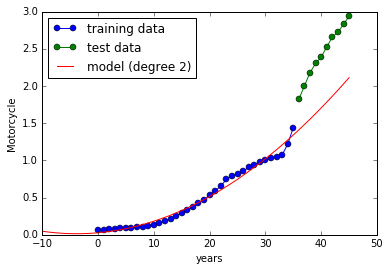

Predictions
Year - number of vehicles
[[ 2016.             2.19969611]
 [ 2017.             2.28828176]
 [ 2018.             2.37862746]
 [ 2019.             2.47073321]]
-------------------------------------------------


In [214]:
for i in df.columns.values[2:8]:
    print i
    xTraining, xTest, yTraining, yTest = prepareData(df.Year, df[i], baseYear, 1000000.)
    degree, minError = findBestPolynomialOrder(xTraining, yTraining, xTest, yTest)
    model = Model(degree, xTraining, yTraining)
    # print degree, minError

    plot(xTraining, yTraining, xTest, yTest, model, "years", i)
    
    # predictions from 2016 to 2020
    predictionsYears = np.matrix(range(2016, 2020)).T - baseYear
    predictionsValues = model.predict(predictionsYears)
    print "Predictions\nYear - number of vehicles"
    print np.hstack([predictionsYears + baseYear, predictionsValues])
    print "-------------------------------------------------"

### Autoregressive model

Car


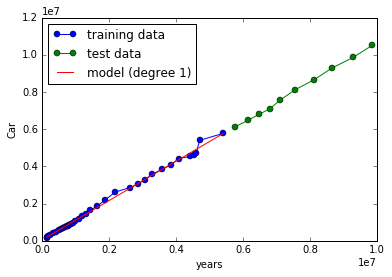

-------------------------------------------------
Minibus


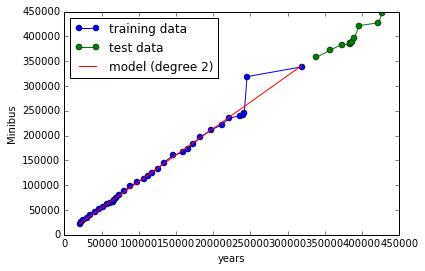

-------------------------------------------------
Bus


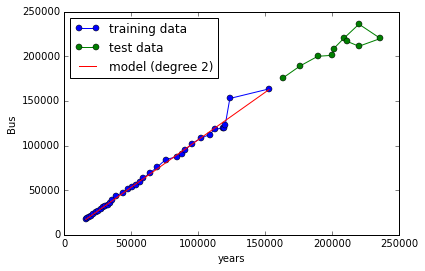

-------------------------------------------------
SmallTruck


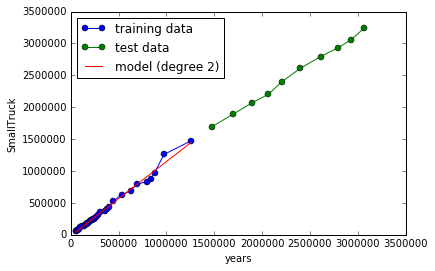

-------------------------------------------------
Truck


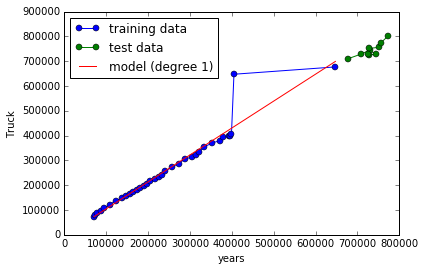

-------------------------------------------------
Motorcycle


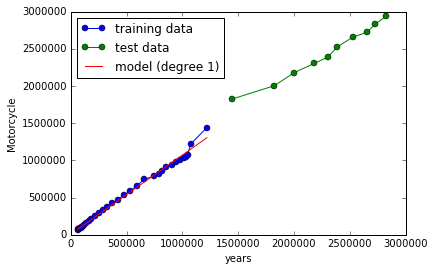

-------------------------------------------------


In [213]:
for i in df.columns.values[2:8]:
    print i
    
    x, y = df[i][:-1], df[i][1:]
    
    xTraining, xTest, yTraining, yTest = prepareData(x, y, 0, 1.)
    
    degree, minError = findBestPolynomialOrder(xTraining, yTraining, xTest, yTest)
    model = Model(degree, xTraining, yTraining)
    # print degree, minError

    plot(xTraining, yTraining, xTest, yTest, model, "years", i)
    
    print "-------------------------------------------------"
    